# Подготовительный этап

## Получение чата

### Подготовительный этап

#### Цели:
1. Получить ***vk token***
2. Получить ***id чата***, состоящий из двух цифр
3. Определиться, должна ли будет проводиться загрузка фото и стикеров

#### Решение:
1. Гугл в помощь + ***.env*** для хранения
2. Адресная строка в помощь
3. Введена дополнительная переменная для определения того, следует ли пытаться загрузить изображения и стикеры, или нет

In [ ]:
import vk_api
import requests as rq
import pandas as pd
from math import ceil
from datetime import datetime

from dotenv import dotenv_values

secrets = dotenv_values(".env")
"""Секреты"""

vk = vk_api.VkApi(
    token=secrets['VK_TOKEN'])
"""Модуль ВК"""

id_chat = int(secrets['CHAT_ID'])
"""id чата"""

SHOULD_DOWNLOAD_PHOTO = False
"""Должна ли проводиться загрузка фото"""
SHOULD_DOWNLOAD_STICKER = False
"""Должна ли проводиться загрузка стикеров"""


'Должна ли проводиться загрузка фото'

In [47]:
rq.get(f"https://vk.com/sticker/1-1-512b").content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x03\x00\x00\x00\xc3\xa6$\xc8\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x87PLTEGpL\xb2\xb2\xb2\xd1\xd1\xd1\xed\xed\xedaaa\xe6\xe6\xe6\xf6\xf6\xf6\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe7\xe1\xe2\xef\xf0\xf5\xff\xff\xff\x99\xa1\xa4\x8b\xa7\xac0**QEE\xafGG\xf5\xf6\xf9\xeb\x82o\x95\x9d\xa0KAA\xd1\xd5\xd7\xe8\xea\xed\xdd\xdf\xe2\xbd\xc3\xc5\xa8\xb2\xb5\x8844\x9b\xa4\xa7\xc6\xcc\xcf\xa2\xaa\xac\xb5\xb8\xba\x8112\x92\xad\xb1*##`^_:44\xbb^Ywxz\xa4@?\x80\x90\x94\xaa\xbe\xc2\xb3uv\xac\x8c\x8e\x1b\x14\x14\xc8Ja\xc2\x00\x00\x00\x0btRNS\x00Ce\xaa+\x8f\xc8\x05\x0c\x19\xe89\xc0\x87\x86\x00\x00 \x00IDATx\xda\xec\\\x8b\x8e\xa3\xb8\x12\xed\xa4\xf3Z\x11:\xc826 \x0c\xea\x06\xa1\x8ct\xff\xff\xfb\xaem^6.\x83I;\xe9Wj\xb4\xda\x9d\x9dL\x03>\xc7\xa7N\x95\x8b\xbc\xbc<\xe3\x19\xcfx\xc6\xdf\x8cc\x17\xcf\x95\xf8\x9b\xb8\x1b\xf1\\\x9a?\x86\xfd\xa9\xfb\xf5$\xc1_C\xff$c\xf7\xb2\xeb\x83\xf

### Определение функций

Необходимо определиться с тем, как будет получаться необходимая информация с vk.
Поскольку используется ***vk_api***, то можно использовать официальную документацию по работе с api.

**get_chat** — работает с ***vk.method***, поэтому все параметры приходится прописывать в роли dictionary.
**download_&** — работает с помощью ***urllib3***. Получается изображение с сайта, затем оно сохраняется и готово.

Дополнительную информацию можно прочесть в документации в коде.

In [48]:
def download_image(url: str) -> None:
    """

    Функция загрузки изображения

    :param url: URL адрес картинки
    :type url: str

    :return: Сохраняет картинку в папку
        Каждая картинка появляется лишь 1 раз
    :rtype: None

    """
    file_name = (url.split("/")[-1]).split("?")[0]
    """Имя картинки"""

    result_image = rq.get(url)
    """Полученное изображение"""
    with open(f'content/visual/images/{file_name}', 'wb') as image:
        image.write(result_image.content)


def download_sticker(id_sticker: int) -> None:
    """

    Функция загрузки стикера

    :param id_sticker: Номер стикера
    :type id_sticker: int

    :return: Сохраняет стикер в папку
        Каждый стикер появляется лишь 1 раз
        Стикеры сохраняются в формате .png в разрешении 512x512
    :rtype: None

    """
    result_sticker = rq.get(f"https://vk.com/sticker/1-{id_sticker}-512b")
    """Полученный стикер"""
    with open(f'content/visual/stickers/{id_sticker}.png', 'wb') as f:
        f.write(result_sticker.content)


def get_chat(peer_id: int = id_chat, count: int = 200, offset: int = 0) -> dict:
    """

    Позволяет получить сообщения из чата.

    :param peer_id: id чата.
        Работает через peer
    :type peer_id: int
    :param count: Количество получаемых сообщений <= 200
    :type count: int
    :param offset: Сдвиг от начального сообщения
    :type offset: int

    :return: Словарь с сообщениями и их параметрами
    :rtype: dict

    """
    # Требуется добавлять 2e9 по документации vk api
    peer_id += 2e9

    return vk.method('messages.getHistory',
                     {'peer_id': peer_id,
                      'count': count,
                      'offset': offset,
                      'rev': 1,
                      'extended': True}
                     )


### Получение чата

Теперь необходимо получить сам чат.

Делается это в два этапа:

#### Этап 1:
##### Получение длины чата.

Берётся одно сообщение из чата.
В каждый ***response*** закладывается количество сообщений в чате.
С его помощью можно завести цикл по количеству сообщений.

#### Этап 2:
##### Сам цикл.

За раз я могу получить лишь 200 сообщений из чата.
***delta*** делает отступ от первого сообщения в чате, а также является счётчиком того, сколько сообщений было прочитано.

#### Этап 3:
##### Получение пользователей.

Каждый раз при запуске нового большого цикла производится добавление пользователей, что так или иначе были задействованы в этих сообщениях (пересланные сообщения и реакции тоже считаются), добавляются в **users_mass**, содержащий **id** пользователей и их **Имя** и **Фамилию**.

Пользователи с удалённым профилем тоже обрабатываются. В качестве **Имени** ***vk*** даёт им *DELETED*, а в качестве **Фамилии** берётся их **id**.

#### Этап 4:
##### Разбор сообщений.

Сообщения имеют следующие характеристики:
1. **id самого сообщения**. id считается относительно всех сообщений в чате
2. **id пользователя**
3. **Является ли действием** *(добавление/исключение пользователей)*
4. **Пересылается ли сообщение в сообщении**
5. **Текст сообщения**
6. **Приложенный файл**
7. **Реакции на сообщение**
8. **Информация о сообщении, на которое даётся ответ**. Необходимо брать эту информацию, поскольку может быть ситуация, когда сообщение, на которое был дан ответ, было позже удалено.

Более подробно о том, как разбираются сообщения будет лучше посмотреть в коде, но если вкратце — берётся разнообразная информация из оригинального сообщения (**message_data**) и добавляется в финальное сообщение (**message**), которое затем добавляется в **msg_mass**.

Удалённые сообщения. Но вместо их **id** берётся константа *404404* и приписывается текущее количество удалённых сообщений.


In [49]:
length_chat = get_chat(count=1)['count']
"""Количество сообщений в чате"""

msg_mass = []
"""Массив сообщений"""

users_mass = {}
"""Список пользователей"""

count_dead_msg = 0
"""Количество удалённых сообщений, на которые был дан ответ"""

start_time = datetime.now()
"""Время начала получения статистики"""
for times_add in range(int(ceil(length_chat / 200))):

    delta = 200 * times_add
    """Отступ от первого сообщения"""
    messages = get_chat(count=min(200, length_chat - delta), offset=delta)
    """count сообщений после delta"""

    for profile in messages['profiles']:
        if users_mass.get(profile['id']):
            continue
        users_mass[profile['id']] = profile['first_name'] + " "
        if profile['last_name'] == '':
            users_mass[profile['id']] += str(profile['id'])
        else:
            users_mass[profile['id']] += profile['last_name']

    for message_data in messages['items']:
        isForwarding = True if message_data.get("fwd_messages") else False
        """Пересылается ли сообщение"""

        isAction = True if message_data.get('action') else False
        """Является ли сообщение действием"""

        attachments_type = "None"
        """Тип прикреплённого сообщения"""
        attachments = []
        """Прикреплённые доп. материалы"""
        if message_data.get('attachments'):

            for attachment in message_data['attachments']:
                if attachment['type'] == 'photo':
                    attachments_type = 'photo'
                    attachments.append(
                        (((attachment['photo']['sizes'][-1]['url']).split("/")[-1]).split("?"))[0]
                    )
                elif attachment['type'] == 'sticker':
                    attachments_type = 'sticker'
                    attachments.append(str(attachment['sticker']['sticker_id']) + ".png")

        reactions = [0] * (16 + 1)
        """Реакции"""
        if message_data.get('reactions'):
            # Почему-то не всегда показывает тех, кто ставил реакции
            # #1
            for reaction in message_data['reactions']:
                reactions[0] += reaction['count']
                user_list = [reaction['count']]
                for user in reaction['user_ids']:
                    user_list.append(user)
                reactions[reaction['reaction_id']] = user_list

        response = {'id': -1,
                    'date': -1,
                    'user_id': -1,
                    'text': "None",
                    'attachments': {'type': "None",
                                    'value': []
                                    # Содержит в себе название файла
                                    }
                    }
        """Ответ на сообщение"""
        if message_data.get('reply_message'):
            reply = message_data['reply_message']
            if reply.get('conversation_message_id'):
                response['id'] = reply['conversation_message_id']
            if not reply.get('conversation_message_id') or response['id'] is None:
                response['id'] = int(f'404404{count_dead_msg}')
                count_dead_msg += 1
            response['date'] = reply['date']
            response['user_id'] = reply['from_id']
            response['text'] = reply['text']

            for attachment in reply['attachments']:
                if attachment['type'] == 'photo':
                    response['attachments']['type'] = 'photo'
                    response['attachments']['value'].append(
                        (((attachment['photo']['sizes'][-1]['url']).split("/")[-1]).split("?"))[0]
                    )
                elif attachment['type'] == 'sticker':
                    response['attachments']['type'] = 'sticker'
                    response['attachments']['value'].append(str(attachment['sticker']['sticker_id']) + ".png")

        message = {'id': message_data['conversation_message_id'],
                   'date': message_data['date'],
                   'isAction': isAction,
                   'isForwarding': isForwarding,
                   'id_user': message_data['from_id'],
                   'text': message_data['text'],
                   'attachments_type': attachments_type,
                   'attachments': attachments,
                   'reactions': reactions,
                   'response_id': response['id'],
                   'response_date': response['date'],
                   'response_id_user': response['user_id'],
                   'response_text': response['text'],
                   'response_attachments_type': response['attachments']['type'],
                   'response_attachments': response['attachments']['value']
                   }
        """Сообщение"""

        msg_mass.append(message)

        # Загрузка доп данных
        if any((SHOULD_DOWNLOAD_PHOTO, SHOULD_DOWNLOAD_STICKER)) and message_data.get('attachments'):
            for attachment in message_data['attachments']:
                if attachment['type'] == 'photo' and SHOULD_DOWNLOAD_PHOTO:
                    download_image(attachment['photo']['sizes'][-1]['url'])
                elif attachment['type'] == 'sticker' and SHOULD_DOWNLOAD_STICKER:
                    download_sticker(attachment['sticker']['sticker_id'])

end_time = datetime.now()
"""Время завершения программы получения статистики"""
print(end_time - start_time)

users_df = pd.DataFrame(users_mass.items(), columns=['id', 'username'])
chat_df = pd.DataFrame(msg_mass)

users_df

KeyboardInterrupt: 

In [ ]:
chat_df

,id,date,isAction,isForwarding,id_user,text,attachments_type,attachments,reactions,response_id,response_date,response_id_user,response_text,response_attachments_type,response_attachments
0,847,1660100832,False,False,352169415,"Ну, теперь на егэ поху",None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,None,None,[]
1,848,1660100835,False,False,657900781,у меня потом такой тильт из-за резов был ахвхв...,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,None,None,[]
2,849,1660100838,False,False,352169415,Поступил и отлично,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,None,None,[]
3,850,1660100842,False,False,657900781,сейчас главное что поступила и все,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",848,1660100835,657900781,у меня потом такой тильт из-за резов был ахвхв...,None,[]
4,851,1660100850,False,False,267228976,это самое главное,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",849,1660100838,352169415,Поступил и отлично,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175629,177611,1700312261,True,False,267228976,,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,None,None,[]
175630,177612,1701352697,False,False,529577677,Очень интересно,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,None,None,[]
175631,177613,1701352787,False,False,529577677,Прощайте,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,None,None,[]
175632,177614,1701352798,True,False,529577677,,None,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,None,None,[]


Проверка на правильность вводимых типов данных.

Некоторые из них помечены как *object*. Это *str*, *dict*, *list* и им подобные структуры данных.

In [ ]:
chat_df.dtypes.sort_values()

isAction                       bool
isForwarding                   bool
id                            int64
date                          int64
id_user                       int64
response_id                   int64
response_date                 int64
response_id_user              int64
text                         object
attachments_type             object
attachments                  object
reactions                    object
response_text                object
response_attachments_type    object
response_attachments         object
dtype: object

## Сохранение
Сохраним данные, чтобы, при получении статистики в несколько этапов, не приходилось каждый раз её генерировать.

In [ ]:
chat_df.to_csv("content/History.csv")
users_df.to_csv("content/Users.csv")

# Статистика

## Загрузка
Процесс, обратный сохранению.

In [93]:
chat_df = pd.read_csv("content/History.csv", index_col="Unnamed: 0")
users_df = pd.read_csv("content/Users.csv")

In [94]:
to_transform_columns = ['attachments', 'reactions', 'response_attachments']
"""Колонки, которые необходимо привести к нормальному виду"""
for column in to_transform_columns:
    chat_df[column] = chat_df[column].apply(lambda x: eval(x))

In [95]:
chat_df

,id,date,isAction,isForwarding,id_user,text,attachments_type,attachments,reactions,response_id,response_date,response_id_user,response_text,response_attachments_type,response_attachments
0,847,1660100832,False,False,352169415,"Ну, теперь на егэ поху",NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
1,848,1660100835,False,False,657900781,у меня потом такой тильт из-за резов был ахвхв...,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
2,849,1660100838,False,False,352169415,Поступил и отлично,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
3,850,1660100842,False,False,657900781,сейчас главное что поступила и все,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",848,1660100835,657900781,у меня потом такой тильт из-за резов был ахвхв...,NaN,[]
4,851,1660100850,False,False,267228976,это самое главное,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",849,1660100838,352169415,Поступил и отлично,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175629,177611,1700312261,True,False,267228976,NaN,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
175630,177612,1701352697,False,False,529577677,Очень интересно,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
175631,177613,1701352787,False,False,529577677,Прощайте,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
175632,177614,1701352798,True,False,529577677,NaN,NaN,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]


In [96]:
users_df

,Unnamed: 0,id,username
0,0,205170325,Дарья Белоусова
1,1,228579277,Яна Шевелёва
2,2,267228976,Александр Пушкарёв
3,3,305187037,Максим Завязочников
4,4,352169415,Денис Севостьянов
...,...,...,...
332,332,288927172,Вадим Зотов
333,333,284711423,Артём Цеппелев
334,334,412777661,Maria Oguzok
335,335,690543725,Ruoy Tluaf


## Статистика

In [118]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import pytz
import matplotlib.image as mpimg

Введём дополнительную функцию, позволяющую перевести время из *UTC* в *YYYY-MM-DD HH:MM:SS*

In [98]:
def get_date(utc_date: int, ymd: bool = True, h: bool = True) -> str:
    """

    Перевод даты из UTC формата в нормальный формат

    :param h: Должны ли быть выведены Часы?
    :type h: bool
    :param ymd: Должны ли быть выведены Год Месяц День?
    :type ymd: bool
    :param utc_date: Дата в формате utc
    :type utc_date: int
    
    :exception: Можно или запросить всё целиком, или только год-месяц-день, или только часы.
        Нельзя запросить ничего!

    :return: Дата в формате YYYY-MM-DD HH:MM:SS
    :rtype: str

    """
    timezone = pytz.timezone("Asia/Vladivostok")
    """Ваша временная зона"""
    date = datetime.fromtimestamp(utc_date, tz=timezone)
    """Дата без форматирования"""
    if ymd and h:
        return date.strftime('%Y-%m-%d %H:%M:%S')
    elif ymd:
        return date.strftime('%Y-%m-%d')
    elif h:
        return date.strftime('%H')
    else:
        raise Exception("Неправильный запрос!")


### Получение информации из самих сообщений

#### Количество сообщений

In [99]:
messages_count = (chat_df.groupby(['id_user'])[['id']].count().merge(users_df, left_on='id_user', right_on='id')[
                      ['username', 'id_x']].rename({'id_x': 'count'}, axis='columns')
                  .sort_values(by='count', ascending=False).reset_index(drop=True))

messages_count.head(26)

,username,count
0,Даниил Плешанов,24631
1,Александр Каменев,24115
2,Аля Знаток,15244
3,Яна Шевелёва,13730
4,Денис Севостьянов,11244
5,Александра Корчевец,10372
6,Владислав Слободской,9600
7,Сергей Смирнов,6240
8,Алеусандр Меок,6092
9,Дина Винницкая,5585


In [100]:
date_df = chat_df['date'].map(lambda x: get_date(x, h=False))
date_df = date_df.groupby(date_df).count().rename('count')

date_df

date
2022-08-10     731
2022-08-11    2791
2022-08-12    2300
2022-08-13     850
2022-08-14     137
              ... 
2023-11-16    2008
2023-11-17     245
2023-11-18       2
2023-11-30       3
2024-02-24       1
Name: count, Length: 463, dtype: int64

In [101]:
date_time_df = chat_df['date'].map(lambda x: get_date(x, ymd=False))
date_time_df = date_time_df.groupby(date_time_df).count().rename('count')

date_time_df

date
00    12269
01     4258
02     1227
03      693
04      904
05      117
06      147
07      839
08     2004
09     2729
10     3567
11     4560
12     4871
13     5426
14     7248
15     6895
16     9485
17    10461
18    12904
19    14823
20    13198
21    18308
22    19249
23    19452
Name: count, dtype: int64

In [102]:
pairs_msg = (chat_df.loc[0:,
             ['id', 'id_user', 'text', 'response_id', 'response_id_user', 'response_text', 'response_attachments_type',
              'response_attachments']])
pairs_msg = pairs_msg[pairs_msg['response_id'] != -1]
pairs_msg['count'] = pairs_msg.groupby(['response_id', 'text'])['response_id'].transform('count')
pairs_msg = pairs_msg.groupby(['response_id']).head(1)

pairs_msg = pairs_msg.merge(users_df, left_on='response_id_user', right_on='id')

pairs_msg = pairs_msg[pairs_msg['count'] > 1]

pairs_msg = pairs_msg[['username', 'response_text', 'text', 'response_attachments_type', 'response_attachments', 'count']]
pairs_msg = (pairs_msg.sort_values(by=['count', 'response_attachments', 'text'], ascending=[False, True, False])).reset_index(drop=True)

pairs_msg = pairs_msg.rename({'text': 'response', 'response_text': 'text',
                              'response_attachments': 'attachments', 'response_attachments_type': 'attachments_type'}, axis='columns')

pairs_msg = pairs_msg.astype({'count': int})
pairs_msg

TypeError: unhashable type: 'list'

In [103]:
most_replied_msg = chat_df.loc[0:, ['id_user', 'response_id', 'response_id_user']]
most_replied_msg = most_replied_msg[most_replied_msg['response_id'] != -1]

most_replied_msg['count'] = most_replied_msg.groupby(['response_id_user', 'id_user'])[['response_id_user']].transform(
    'count')
most_replied_msg = most_replied_msg.groupby(['response_id_user']).head(1)
most_replied_msg = most_replied_msg[most_replied_msg['count'] > 1]

most_replied_msg = most_replied_msg.merge(users_df, left_on='response_id_user', right_on='id')
most_replied_msg = most_replied_msg.merge(users_df, left_on='id_user', right_on='id')

most_replied_msg = most_replied_msg.rename({'username_x': "replied_to", 'username_y': "replied_by"}, axis='columns')
most_replied_msg = most_replied_msg[['replied_to', 'replied_by', 'count']]
most_replied_msg = most_replied_msg.sort_values(by=['count', 'replied_to', 'replied_by'],
                                                ascending=[False, False, False]).reset_index(drop=True)

most_replied_msg


,replied_to,replied_by,count
0,Александр Каменев,Алеусандр Меок,339
1,Владислав Слободской,Денис Севостьянов,260
2,Артемий Поповкин,Даниил Плешанов,236
3,Алеусандр Меок,Яна Шевелёва,219
4,Александр Ковш,Даниил Плешанов,201
5,Алиса Матвеева,Денис Севостьянов,118
6,Даниил Плешанов,Алеусандр Меок,98
7,Аля Знаток,Сергей Смирнов,91
8,Артем Громыко,Александра Корчевец,83
9,Эрсан Егоров,Елизавета Исаева,80


In [181]:
stickers_df = chat_df[chat_df['attachments_type'] == 'sticker'].copy()
stickers_df['attachments'] = stickers_df['attachments'].apply(lambda x: x[0])
stickers_df

,id,date,isAction,isForwarding,id_user,text,attachments_type,attachments,reactions,response_id,response_date,response_id_user,response_text,response_attachments_type,response_attachments
190,1038,1660101904,False,False,603817821,NaN,sticker,126.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1032,1660101785,228579277,"Да)\nНо и матан тоже даётся не сразу сложный, ...",NaN,[]
201,1049,1660102131,False,False,228579277,NaN,sticker,61054.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1048,1660102112,267228976,"Раз уж зашла речь про матан, то сейчас распишу...",NaN,[]
251,1100,1660103685,False,False,303277718,NaN,sticker,73601.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
252,1101,1660103687,False,False,228579277,NaN,sticker,62800.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
253,1102,1660103698,False,False,417852815,NaN,sticker,57872.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175386,177368,1700144257,False,False,354517433,NaN,sticker,69554.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
175387,177369,1700144267,False,False,354517433,NaN,sticker,69555.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[]
175392,177374,1700144296,False,False,603817821,NaN,sticker,87472.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",177369,1700144267,354517433,NaN,sticker,[69555.png]
175428,177410,1700144559,False,False,603817821,NaN,sticker,85071.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",177407,1700144544,354517433,"Бля ребят я надеюсь Абрахам это не прочитает, ...",NaN,[]


In [ ]:
stickers_df['global_count'] = stickers_df.groupby('attachments')['id'].transform('size')
stickers_df.sort_values('global_count', ascending=False)

C:\Users\artem\AppData\Local\Temp\ipykernel_16876\2620996626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stickers_df['count'] = stickers_df.groupby('attachments')['id'].transform('size')


,id,date,isAction,isForwarding,id_user,text,attachments_type,attachments,reactions,response_id,response_date,response_id_user,response_text,response_attachments_type,response_attachments,count
46748,47853,1665832966,False,False,554777162,NaN,sticker,72801.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[],187
101199,102590,1675073174,False,False,666136998,NaN,sticker,72801.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[],187
50584,51709,1666413815,False,False,554777162,NaN,sticker,72801.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[],187
51152,52278,1666442523,False,False,554777162,NaN,sticker,72801.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[],187
51260,52386,1666443358,False,False,554777162,NaN,sticker,72801.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[],187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,21109,1663487519,False,False,228579277,NaN,sticker,13634.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[],1
111102,112556,1679876969,False,False,554777162,NaN,sticker,12689.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",112555,1679876938,426574767,Мне её задала Малыкина решить,NaN,[],1
111045,112499,1679834952,False,False,267228976,NaN,sticker,15834.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",112498,1679834930,536025091,современный*,NaN,[],1
110869,112320,1679735915,False,False,453792061,NaN,sticker,69044.png,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1,-1,-1,NaN,NaN,[],1


('72801.png', 187)
('163.png', 149)
('94254.png', 94)
('5435.png', 57)
('55362.png', 56)
('61413.png', 55)
('126.png', 54)
('4279.png', 50)
('70493.png', 40)
('73596.png', 40)


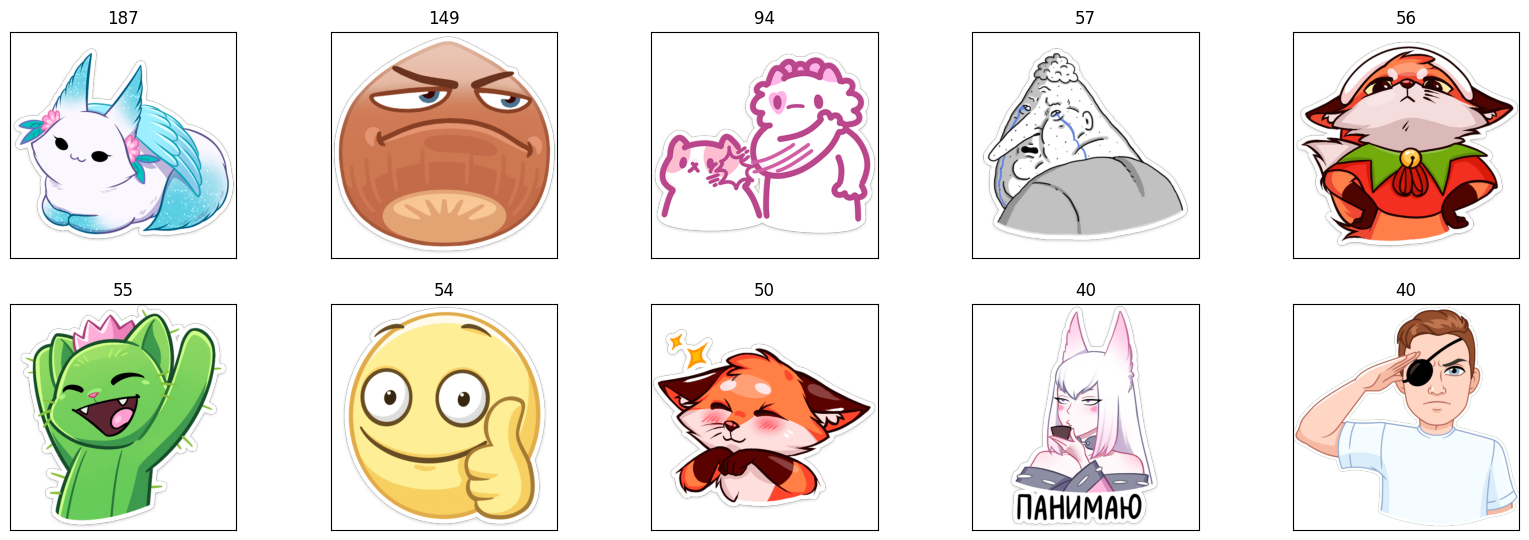

In [180]:
plt.figure(figsize=(20, 10))
ct_img = 10
columns = 5

for i, img_name in enumerate(stickers_df.groupby('attachments')['id'].count().sort_values(ascending=False).head(10).items()):
    print(img_name)
    plt.subplot(ct_img // columns + 1, columns, i + 1)
    img = mpimg.imread(f"content/visual/stickers/{img_name[0]}")
    plt.yticks([])
    plt.xticks([])
    plt.title(f'{img_name[1]}')
    plt.imshow(img)